In [21]:
### Import libraries
import pandas as pd # primary data structure library
import plotly.graph_objects as go
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
from PIL import Image # converting images into arrays
import matplotlib.patches as mpatches # needed for waffle Charts
import folium # to create maps
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Downloading Data 

In [22]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

# Exploring Data

In [23]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-12-25 05:22:48,33.93911,67.709953,50655,2126,40359,8170.0,Afghanistan,130.123706,4.197019
1,NaN,NaN,NaN,Albania,2020-12-25 05:22:48,41.15330,20.168300,54827,1125,30276,23426.0,Albania,1905.170616,2.051909
2,NaN,NaN,NaN,Algeria,2020-12-25 05:22:48,28.03390,1.659600,97007,2705,64777,29525.0,Algeria,221.219368,2.788459
3,NaN,NaN,NaN,Andorra,2020-12-25 05:22:48,42.50630,1.521800,7699,83,7171,445.0,Andorra,9964.408206,1.078062
4,NaN,NaN,NaN,Angola,2020-12-25 05:22:48,-11.20270,17.873900,17029,393,9729,6907.0,Angola,51.813002,2.307828


In [24]:
print ('dataframe dimensions:', df.shape)

dataframe dimensions: (3976, 14)


# Prepping Data 

In [25]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS                    True
Admin2                  True
Province_State          True
Country_Region         False
Last_Update            False
Lat                     True
Long_                   True
Confirmed              False
Deaths                 False
Recovered              False
Active                  True
Combined_Key           False
Incident_Rate           True
Case_Fatality_Ratio     True
dtype: bool

In [26]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  191
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [27]:
### Replace NaN values by 0
df.fillna(0, inplace=True)
### Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
### Rename the columns so that they make sense
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
### Re-order Columns
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
### Group datas by Country
df_countries_grouped=df_countries.groupby('Country').sum()
### Set the country name as index
df_countries.set_index('Country', inplace=True)

In [28]:
# view the final dataframe
df_countries_grouped.head()

,Confirmed,Active,Recovered,Deaths
Country,,,,
Afghanistan,50655,8170.0,40359,2126
Albania,54827,23426.0,30276,1125
Algeria,97007,29525.0,64777,2705
Andorra,7699,445.0,7171,83
Angola,17029,6907.0,9729,393


In [29]:
print ('data dimensions:', df_countries_grouped.shape)

data dimensions: (191, 4)


In [30]:
confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()

# Visualizing Data

In [31]:
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

### Creating Dataframe with Totals

In [32]:
df_tot = pd.DataFrame(columns=['Confirmed', 'Active', 'Recovered','Deaths'])
# Append rows in Empty Dataframe by adding dictionaries
df_tot = df_tot.append({'Confirmed': confirmed_sum, 'Active': active_sum, 'Recovered': recovered_sum,'Deaths': death_sum}, ignore_index=True)

### Plot Total Cases

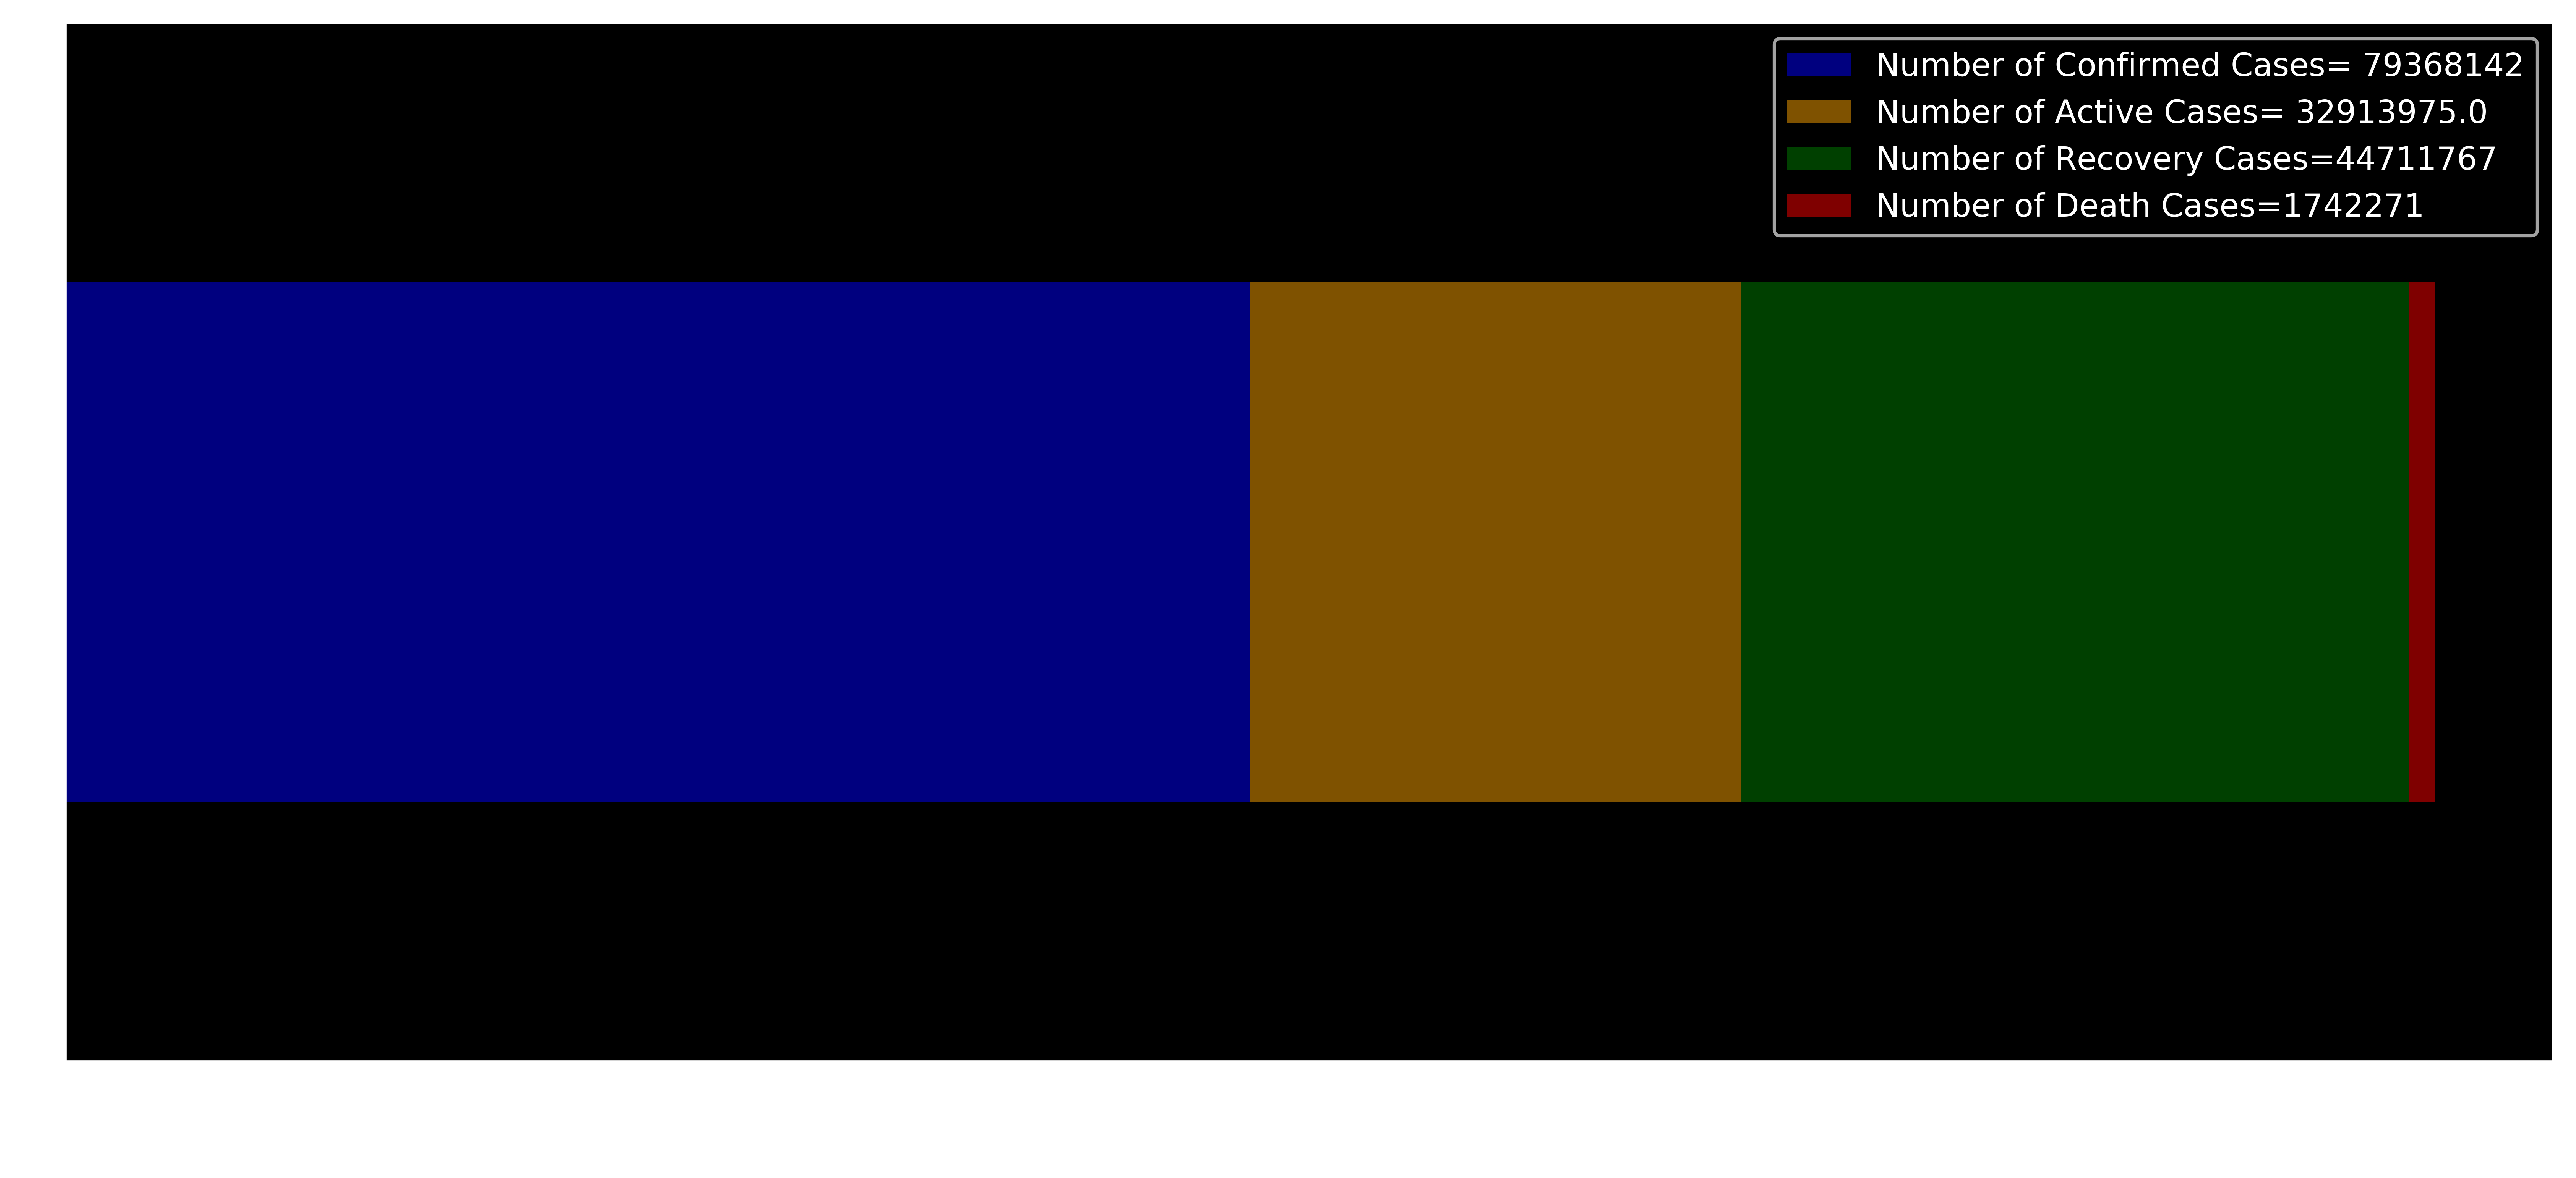

In [33]:
df_tot.plot(kind='barh', figsize=(14, 6),stacked=True, 
             alpha=0.5, 
            color=['blue', 'orange', 'green', 'red']) 
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper right', fontsize=10)
plt.savefig('img/total-cases.png')
plt.show()

### Visualize hierarchical data using nested rectangles. 
Click on one sector to zoom in/out, which also displays a pathbar in the upper-left corner of your treemap. To zoom out you can use the path bar as well.

In [34]:
#conda install -c conda-forge python-kaleido

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [35]:
fig = px.treemap(df.sort_values(by='Confirmed', ascending=False ).reset_index(drop=True), 
                 path=["Country_Region"], values="Confirmed", 
                 title='Number of Confirmed Cases',color='Confirmed')
fig.write_image('img/treemap.svg')
fig.show()